##### 1. В файле «baseball.csv» находится выборка с информацией по игрокам в бейсбол, включая статистику их результативности, время участия в играх, лига, зарплата и т.д. Name (имя) нужно считать идентификатором записи. Загрузите этот файл и произведите следующие действия для кластерного анализа.

In [278]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

df = pd.read_csv('baseball.csv')
df

,Name,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
0,"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,...,14,American,East,C,446,33,20,NaN,AE,NaN
1,"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,...,375,National,West,C,632,43,10,475.0,NW,6.163315
2,"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,...,263,American,West,1B,880,82,14,480.0,AW,6.173786
3,"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,...,354,National,East,RF,200,11,3,500.0,NE,6.214608
4,"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,...,33,National,East,1B,805,40,4,91.5,NE,4.516339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"McGee, Willie",St Louis,497,127,7,65,48,37,5,2703,...,138,National,East,CF,325,9,3,700.0,NE,6.551080
318,"Randolph, Willie",New York,492,136,5,76,50,94,12,5511,...,875,American,East,2B,313,381,20,875.0,AE,6.774224
319,"Tolleson, Wayne",Chicago,475,126,3,61,43,52,6,1700,...,146,American,West,3B,37,113,7,385.0,AW,5.953243
320,"Upshaw, Willie",Toronto,573,144,9,85,60,78,8,3198,...,332,American,East,1B,1314,131,12,960.0,AE,6.866933


In [279]:
cat_cols = ['Div', 'Division', 'League', 'Position', 'Team']

numeric_cols = [
    'CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns',
    'Salary', 'nAssts', 'nAtBat', 'nBB', 'nError',
    'nHits', 'nHome', 'nOuts', 'nRBI', 'nRuns', 'YrMajor'
]


##### 2. Обработка пропусков. Переменная Salary (и log Salary) может содержать пропуски, произведите подстановку пропусков методом согласно вашему варианту. Пересчитайте logSalary как log(1+Salary), чтобы получить более симметричное распределение.

In [280]:
df_forcorr=df.drop(columns=cat_cols+['Name'])
correlations = df_forcorr.corr()
relevant_features = correlations[correlations.abs() > 0.5].index.tolist()
relevant_features

['nAtBat',
 'nHits',
 'nHome',
 'nRuns',
 'nRBI',
 'nBB',
 'YrMajor',
 'CrAtBat',
 'CrHits',
 'CrHome',
 'CrRuns',
 'CrRbi',
 'CrBB',
 'nOuts',
 'nAssts',
 'nError',
 'Salary',
 'logSalary']

In [281]:
from sklearn.impute import KNNImputer
import numpy as np


# пересоздание 'logSalary'
df['logSalary'] = np.log1p(df['Salary'])

# инициализация KNNImputer
imputer = KNNImputer(n_neighbors=3)

# применение импутации
df[relevant_features] = imputer.fit_transform(df[relevant_features])

# округление 'Salary' до 1 знака после запятой
df['Salary'] = df['Salary'].round(1)
df['logSalary']=np.log1p(df['Salary'])
df


,Name,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
0,"Allanson, Andy",Cleveland,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,...,14.0,American,East,C,446.0,33.0,20.0,88.3,AE,4.492001
1,"Ashby, Alan",Houston,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,...,375.0,National,West,C,632.0,43.0,10.0,475.0,NW,6.165418
2,"Davis, Alan",Seattle,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,...,263.0,American,West,1B,880.0,82.0,14.0,480.0,AW,6.175867
3,"Dawson, Andre",Montreal,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,...,354.0,National,East,RF,200.0,11.0,3.0,500.0,NE,6.216606
4,"Galarraga, Andres",Montreal,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,...,33.0,National,East,1B,805.0,40.0,4.0,91.5,NE,4.527209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"McGee, Willie",St Louis,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,...,138.0,National,East,CF,325.0,9.0,3.0,700.0,NE,6.552508
318,"Randolph, Willie",New York,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,...,875.0,American,East,2B,313.0,381.0,20.0,875.0,AE,6.775366
319,"Tolleson, Wayne",Chicago,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,...,146.0,American,West,3B,37.0,113.0,7.0,385.0,AW,5.955837
320,"Upshaw, Willie",Toronto,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,...,332.0,American,East,1B,1314.0,131.0,12.0,960.0,AE,6.867974


3. Нормализация переменных – приведите числовые переменные к близким шкалам с помощью 
методов для вашего варианта и закодируйте категориальные с помощью OneHotEncoder.

In [282]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_cols = ['Div', 'Division', 'League', 'Position', 'Team']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(df[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_cols), index=df.index)

df_first_part = df.iloc[:, :1]  
df_rest_part = df.iloc[:, 1:] 

df_encoded = pd.concat([df_first_part, encoded_cat_df, df_rest_part], axis=1)

df_encoded = df_encoded.drop(columns=cat_cols)

df_encoded


,Name,Div_AE,Div_AW,Div_NE,Div_NW,Division_East,Division_West,League_American,League_National,Position_13,...,CrHits,CrHome,CrRuns,CrRbi,CrBB,nOuts,nAssts,nError,Salary,logSalary
0,"Allanson, Andy",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,88.3,4.492001
1,"Ashby, Alan",0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,6.165418
2,"Davis, Alan",0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,6.175867
3,"Dawson, Andre",0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,6.216606
4,"Galarraga, Andres",0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.5,4.527209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"McGee, Willie",0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,700.0,6.552508
318,"Randolph, Willie",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,875.0,6.775366
319,"Tolleson, Wayne",0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,385.0,5.955837
320,"Upshaw, Willie",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,960.0,6.867974


In [283]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = [
    'CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns',
    'logSalary', 'Salary', 'nAssts', 'nAtBat', 'nBB', 'nError',
    'nHits', 'nHome', 'nOuts', 'nRBI', 'nRuns', 'YrMajor'
]


scaler = MinMaxScaler()

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
df_encoded[numeric_cols].describe().T[['min', 'max']]


,min,max
CrAtBat,0.0,1.0
CrBB,0.0,1.0
CrHits,0.0,1.0
CrHome,0.0,1.0
CrRbi,0.0,1.0
CrRuns,0.0,1.0
logSalary,0.0,1.0
Salary,0.0,1.0
nAssts,0.0,1.0
nAtBat,0.0,1.0


4. С помощью восходящей иерархической кластеризации с выбранными параметрами 
расстояния согласно вашему варианту постройте кластерную модель данных и дендрограмму

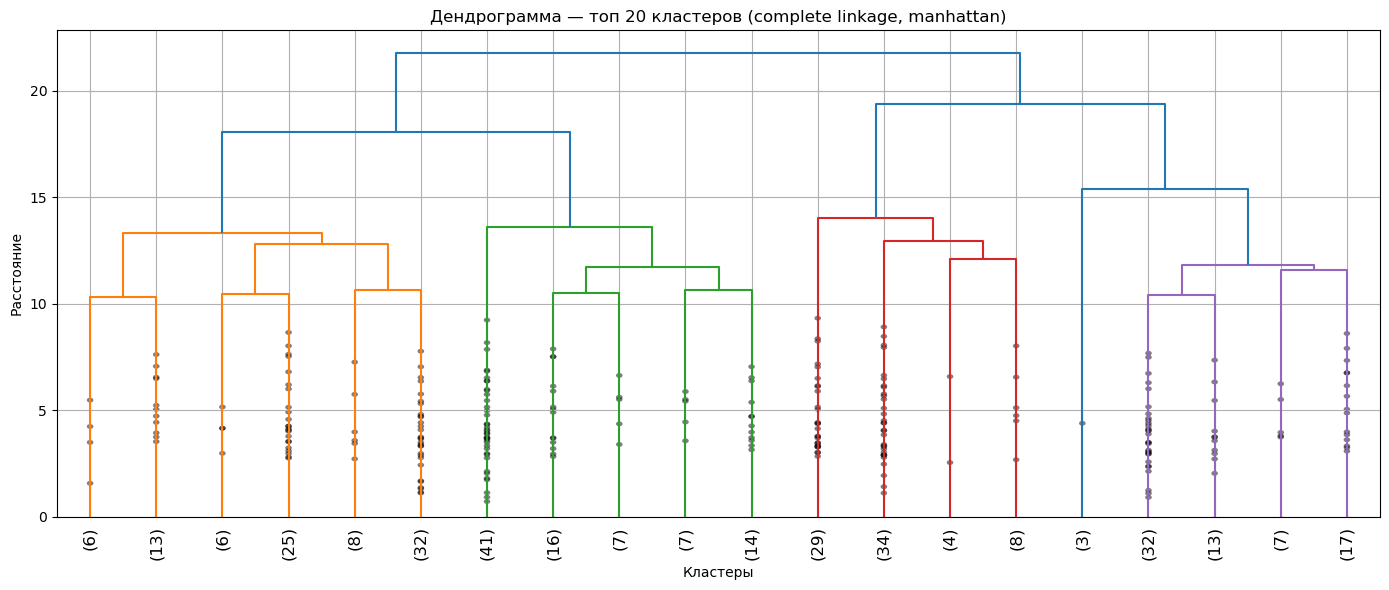

In [284]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

X = df_encoded.drop(columns=['Name'])

distance_matrix = pdist(X, metric='cityblock')

linkage_matrix = sch.linkage(distance_matrix, method='complete')  

plt.figure(figsize=(14, 6))
sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90, leaf_font_size=12, show_contracted=True)
plt.title("Дендрограмма — топ 20 кластеров (complete linkage, manhattan)")
plt.xlabel("Кластеры")
plt.ylabel("Расстояние")
plt.grid(True)
plt.tight_layout()
plt.show()


## Формулы для кластеризации

### Манхэттенское расстояние (Manhattan distance)

Манхэттенское расстояние между двумя точками \( x = (x_1, x_2, ..., x_n) \) и \( y = (y_1, y_2, ..., y_n) \):

$$
D_{\text{Manhattan}}(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

---

### Complete Linkage (полное соединение)

Расстояние между двумя кластерами \( A \) и \( B \) при использовании метода полного соединения (complete linkage) определяется как:

$$
D_{\text{complete}}(A, B) = \max_{a \in A, b \in B} D(a, b)
$$

где \( D(a, b) \) — расстояние между точками \( a \) и \( b \).

---

### Индекс Pseudo-F

Индекс Pseudo-F (Calinski-Harabasz index) для оценки качества кластеризации:

$$
F = \frac{B(k) / (k - 1)}{W(k) / (N - k)}
$$

где:

- \( B(k) \) — межкластерная дисперсия (between-cluster dispersion)
- \( W(k) \) — внутрикластерная дисперсия (within-cluster dispersion)
- \( k \) — количество кластеров
- \( N \) — общее количество объектов

Интерпретация:
- Чем выше значение \( F \), тем качественнее кластеризация.

---

### Напоминание

- Выбираем **первый локальный максимум** графика зависимости \( F \) от \( k \) — он соответствует оптимальному количеству кластеров.


5. Рассчитайте значение критерия pseudoF для вариантов кластеризации 2-20 кластеров, 
постройте график зависимости критерия от числа кластеров и выберите оптимальное (первый 
локальный пик критерия при обходе от малого числа кластеров к большому). Отметьте точку 
на графике. Сколько кластеров получилось?

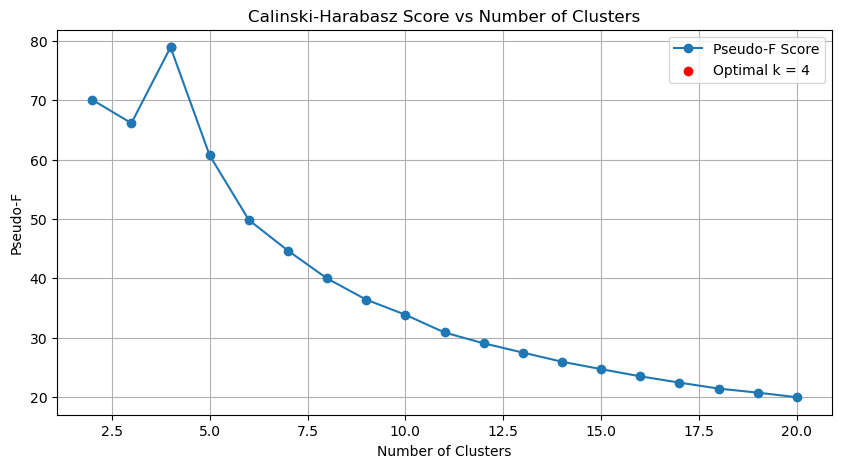

Оптимальное число кластеров: 4


[70.09377419151444,
 66.14881870669605,
 78.94948816390394,
 60.71312811609179,
 49.84825251156206,
 44.67034965046573,
 39.98474695963534,
 36.416639801508445,
 33.86912324825525,
 30.881655974710146,
 29.06024593997747,
 27.49863069960325,
 25.956546934598382,
 24.708589891152517,
 23.496927589048948,
 22.440314242069586,
 21.43146215042322,
 20.751911516605585,
 19.975786265714557]

In [285]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

X_scaled=df_encoded.drop(columns='Name')
Z=linkage_matrix

pseudoF_scores = []
cluster_range = range(2, 21)

for k in cluster_range:
    labels = fcluster(Z, k, criterion='maxclust')
    score = calinski_harabasz_score(X_scaled, labels)
    pseudoF_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, pseudoF_scores, marker='o', label='Pseudo-F Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Pseudo-F')
plt.title('Calinski-Harabasz Score vs Number of Clusters')


scores_array = np.array(pseudoF_scores)
local_maxima = argrelextrema(scores_array, np.greater)[0]

best_k = cluster_range[local_maxima[0]]
best_score = pseudoF_scores[local_maxima[0]]
plt.scatter(best_k, best_score, color='red', label=f'Optimal k = {best_k}')

plt.legend()
plt.grid(True)
plt.show()

print(f'Оптимальное число кластеров: {best_k}')
pseudoF_scores


6. С помощью метода проекции для вашего варианта постройте отображение на плоскость, 
цветом точки укажите номер кластера.  (PCA)

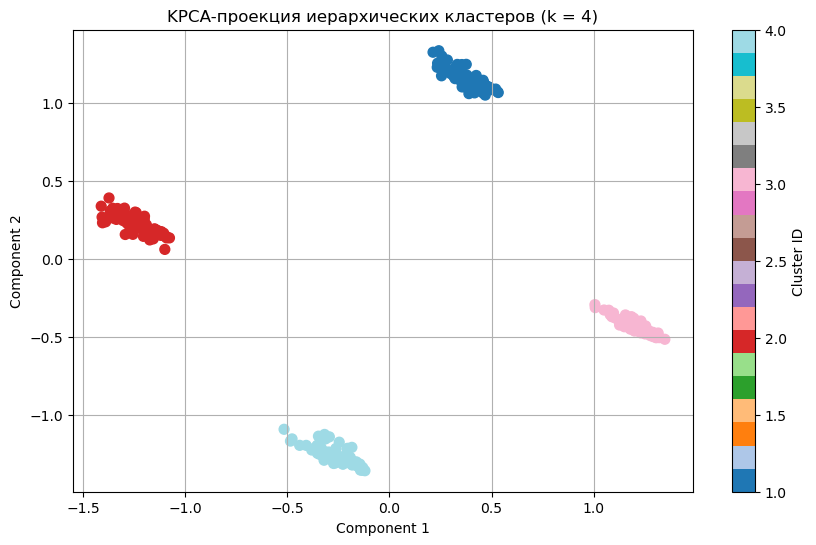

In [286]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Построим проекцию через KPCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Разделение на кластеры (используем Z — результат linkage)
from scipy.cluster.hierarchy import fcluster

k = best_k  # подставляем оптимальное количество кластеров из прошлого шага
labels = fcluster(Z, k, criterion='maxclust')

# 3. Рисуем точки с цветами по кластерам
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab20', s=50)
plt.title(f'KPCA-проекция иерархических кластеров (k = {k})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()


In [287]:
from scipy.spatial.distance import cdist

df_clusters = df.copy()
df_clusters['cluster'] = labels

typical_players = []

for cl in range(1, k + 1):
    cluster_data = X_scaled[df_clusters['cluster'] == cl]
    cluster_names = df_clusters[df_clusters['cluster'] == cl]['Name'].values
    
    centroid = cluster_data.mean(axis=0).values.reshape(1, -1)
    
    distances = cdist(cluster_data, centroid, metric='euclidean').flatten()
    closest_index = distances.argmin()
    typical_players.append((cl, cluster_names[closest_index]))

print("Наиболее типичные игроки по кластерам:")
for cluster_id, name in typical_players:
    print(f"Кластер {cluster_id}: {name}")


Наиболее типичные игроки по кластерам:
Кластер 1: Henderson, Dave
Кластер 2: Hassey, Ron
Кластер 3: Esasky, Nick
Кластер 4: Wilson, Mookie


In [288]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
gmm = GaussianMixture(n_components=k, covariance_type='spherical', random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

In [289]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)      # Проекция исходных данных
means = gmm.means_                       # Центры кластеров в исходном пространстве
means_pca = pca.transform(means)        # Центры в 2D проекции

In [290]:
covariances = gmm.covariances_           # Вектор дисперсий для каждого кластера
radii = np.sqrt(covariances)              # Радиус каждой сферы (кластера)

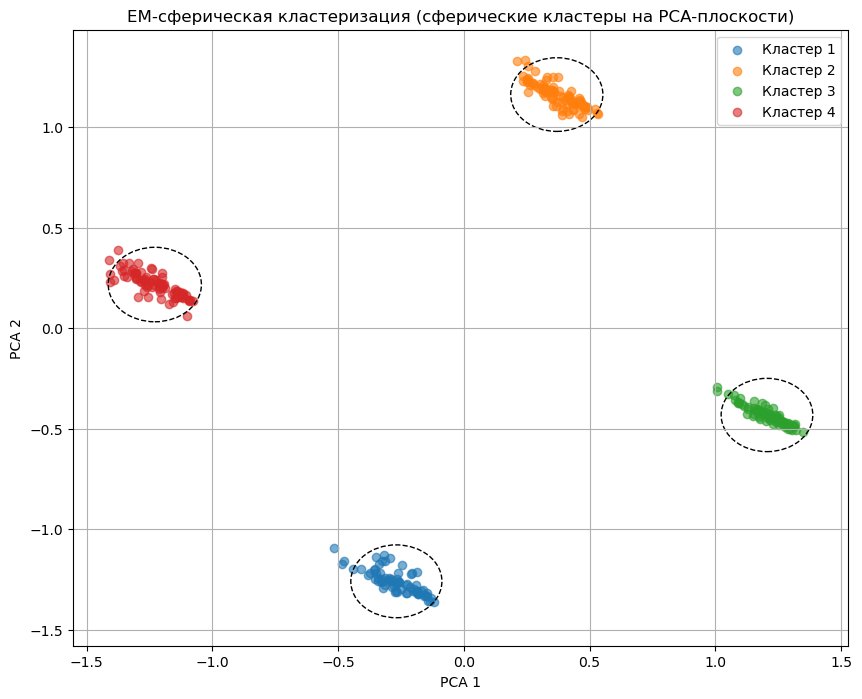

In [291]:
plt.figure(figsize=(10, 8))

for cluster_id in range(k):
    # Точки кластера на 2D
    cluster_points = X_pca[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], alpha=0.6, label=f'Кластер {cluster_id+1}')
    
    # Рисуем окружность с центром в mean и радиусом sqrt(дисперсии)
    circle = plt.Circle((means_pca[cluster_id, 0], means_pca[cluster_id, 1]), 
                        radii[cluster_id], 
                        color='black', fill=False, linestyle='--')
    plt.gca().add_patch(circle)

plt.title("EM-сферическая кластеризация (сферические кластеры на PCA-плоскости)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()


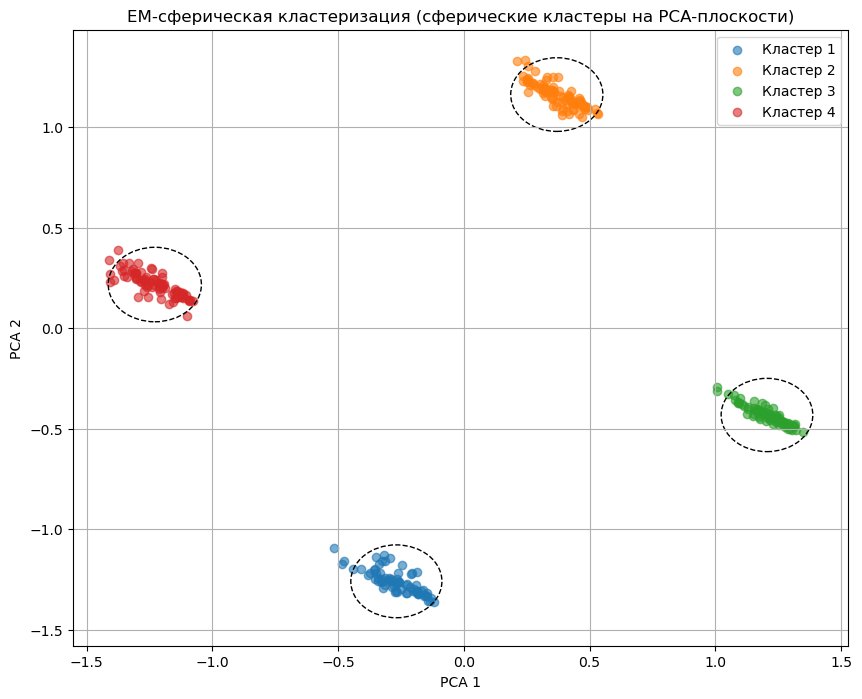

In [292]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


gmm = GaussianMixture(n_components=k, covariance_type='spherical', random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

means = gmm.means_             # shape (k, n_features)
covariances = gmm.covariances_ # shape (k,) — это скалярные дисперсии для каждого кластера

means_pca = pca.transform(means)

plt.figure(figsize=(10, 8))


for cluster_id in range(k):
    cluster_points = X_pca[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], alpha=0.6, label=f'Кластер {cluster_id+1}')
    
    radius = np.sqrt(covariances[cluster_id])
    

    circle = plt.Circle((means_pca[cluster_id, 0], means_pca[cluster_id, 1]), radius, color='black', fill=False, linestyle='--')
    plt.gca().add_patch(circle)

plt.title("EM-сферическая кластеризация (сферические кластеры на PCA-плоскости)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from scipy.signal import argrelextrema


def encode_categorical(df, cat_cols):
    """
    Кодирование категориальных переменных с помощью OneHotEncoder
    
    Args:
        df (pd.DataFrame): исходный датафрейм
        cat_cols (list): список категориальных колонок
    
    Returns:
        pd.DataFrame: закодированные категориальные переменные
    """
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_cats = encoder.fit_transform(df[cat_cols])
    encoded_cat_df = pd.DataFrame(
        encoded_cats, 
        columns=encoder.get_feature_names_out(cat_cols), 
        index=df.index
    )
    return encoded_cat_df


def scale_numerical(df, num_cols):
    """
    Нормализация числовых переменных с помощью MinMaxScaler
    
    Args:
        df (pd.DataFrame): исходный датафрейм
        num_cols (list): список числовых колонок
    
    Returns:
        pd.DataFrame: нормализованные числовые переменные
    """
    # Создание логарифмической переменной для Salary
    df_copy = df.copy()
    if 'Salary' in num_cols:
        df_copy['logSalary'] = np.log1p(df_copy['Salary'])
        if 'logSalary' not in num_cols:
            num_cols = num_cols + ['logSalary']
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_copy[num_cols])
    scaled_df = pd.DataFrame(scaled_data, columns=num_cols, index=df.index)
    
    return scaled_df


def impute_missing(df, k=3):
    """
    Импутация пропущенных значений с помощью KNNImputer
    
    Args:
        df (pd.DataFrame): датафрейм с пропущенными значениями
        k (int): количество соседей для KNN импутации
    
    Returns:
        pd.DataFrame: датафрейм без пропущенных значений
    """
    imputer = KNNImputer(n_neighbors=k)
    imputed_data = imputer.fit_transform(df)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)
    
    # Округление Salary если присутствует
    if 'Salary' in imputed_df.columns:
        imputed_df['Salary'] = imputed_df['Salary'].round(1)
        if 'logSalary' in imputed_df.columns:
            imputed_df['logSalary'] = np.log1p(imputed_df['Salary'])
    
    return imputed_df


def select_high_correlation_features(df, threshold=0.4):
    """
    Отбор признаков с высокой корреляцией
    
    Args:
        df (pd.DataFrame): датафрейм с признаками
        threshold (float): порог корреляции
    
    Returns:
        pd.DataFrame: отфильтрованный датафрейм
    """
    correlations = df.corr()
    relevant_features = correlations[correlations.abs() > threshold].index.tolist()
    return df[relevant_features]


def perform_hierarchical_clustering(df):
    """
    Выполнение иерархической кластеризации
    
    Args:
        df (pd.DataFrame): подготовленные данные
    
    Returns:
        linkage matrix: матрица связей для иерархической кластеризации
    """
    distance_matrix = pdist(df, metric='cityblock')
    Z = sch.linkage(distance_matrix, method='complete')
    return Z


def plot_dendrogram(Z, title="Дендрограмма — топ 20 кластеров"):
    """
    Построение дендрограммы
    
    Args:
        Z: матрица связей
        title (str): заголовок графика
    """
    plt.figure(figsize=(14, 6))
    sch.dendrogram(Z, truncate_mode='lastp', p=20, 
                  leaf_rotation=90, leaf_font_size=12, show_contracted=True)
    plt.title(title)
    plt.xlabel("Кластеры")
    plt.ylabel("Расстояние")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def find_optimal_k(df, Z, n_clusters_range=(2, 21)):
    """
    Поиск оптимального количества кластеров по псевдо-F критерию
    
    Args:
        df (pd.DataFrame): данные для кластеризации
        Z: матрица связей
        n_clusters_range (tuple): диапазон количества кластеров
    
    Returns:
        int: оптимальное количество кластеров
    """
    pseudoF_scores = []
    cluster_range = range(n_clusters_range[0], n_clusters_range[1])
    
    for k in cluster_range:
        labels = fcluster(Z, k, criterion='maxclust')
        score = calinski_harabasz_score(df, labels)
        pseudoF_scores.append(score)
    
    # Поиск первого локального максимума
    scores_array = np.array(pseudoF_scores)
    local_maxima = argrelextrema(scores_array, np.greater)[0]
    
    if len(local_maxima) > 0:
        optimal_k = cluster_range[local_maxima[0]]
        best_score = pseudoF_scores[local_maxima[0]]
    else:
        optimal_k = cluster_range[np.argmax(pseudoF_scores)]
        best_score = max(pseudoF_scores)
    
    # Построение графика
    plt.figure(figsize=(10, 5))
    plt.plot(cluster_range, pseudoF_scores, marker='o', label='Pseudo-F Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Pseudo-F')
    plt.title('Calinski-Harabasz Score vs Number of Clusters')
    plt.scatter(optimal_k, best_score, color='red', s=100, 
               label=f'Optimal k = {optimal_k}', zorder=5)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f'Оптимальное число кластеров: {optimal_k}')
    return optimal_k


def project_with_kpca(df, n_components=2):
    """
    Проекция данных с помощью PCA
    
    Args:
        df (pd.DataFrame): данные для проекции
        n_components (int): количество компонент
    
    Returns:
        np.array: проекция данных на плоскость
    """
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(df)
    return X_pca


def plot_clusters(X_projected, labels, title="Проекция кластеров"):
    """
    Визуализация кластеров на плоскости
    
    Args:
        X_projected (np.array): проекция данных
        labels (np.array): метки кластеров
        title (str): заголовок графика
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1], 
                         c=labels, cmap='tab20', s=50)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(scatter, label='Cluster ID')
    plt.grid(True)
    plt.show()


def perform_em_clustering(df, n_components, random_state=42):
    """
    EM-кластеризация со сферическими кластерами
    
    Args:
        df (pd.DataFrame): данные для кластеризации
        n_components (int): количество кластеров
        random_state (int): seed для воспроизводимости
    
    Returns:
        tuple: (модель GMM, метки кластеров)
    """
    gmm = GaussianMixture(n_components=n_components, 
                         covariance_type='spherical', 
                         random_state=random_state)
    gmm.fit(df)
    em_labels = gmm.predict(df)
    return gmm, em_labels


def plot_em_clusters(df, gmm, em_labels, X_projected):
    """
    Визуализация EM-кластеров со сферами
    
    Args:
        df (pd.DataFrame): исходные данные
        gmm: обученная модель GMM
        em_labels (np.array): метки EM-кластеров
        X_projected (np.array): PCA проекция
    """
    pca = PCA(n_components=2)
    pca.fit(df)
    
    means_pca = pca.transform(gmm.means_)
    covariances = gmm.covariances_
    radii = np.sqrt(covariances)
    
    n_clusters = len(np.unique(em_labels))
    
    plt.figure(figsize=(10, 8))
    
    for cluster_id in range(n_clusters):
        cluster_points = X_projected[em_labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                   alpha=0.6, label=f'Кластер {cluster_id+1}')
        
        # Окружность для сферического кластера
        circle = plt.Circle((means_pca[cluster_id, 0], means_pca[cluster_id, 1]), 
                           radii[cluster_id], color='black', fill=False, linestyle='--')
        plt.gca().add_patch(circle)
    
    plt.title("EM-сферическая кластеризация на PCA-плоскости")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


def find_typical_representatives(df_processed, df_original, labels):
    """
    Поиск наиболее типичных представителей в каждом кластере
    
    Args:
        df_processed (pd.DataFrame): обработанные данные
        df_original (pd.DataFrame): исходные данные с именами
        labels (np.array): метки кластеров
    
    Returns:
        dict: словарь с типичными представителями
    """
    typical_representatives = {}
    n_clusters = len(np.unique(labels))
    
    for cluster_id in range(1, n_clusters + 1):  # fcluster starts from 1
        cluster_mask = labels == cluster_id
        cluster_data = df_processed[cluster_mask]
        cluster_names = df_original[cluster_mask]['Name'].values
        
        if len(cluster_data) > 0:
            # Центр кластера
            center = cluster_data.mean()
            
            # Расстояние до центра кластера
            distances = np.linalg.norm(cluster_data - center, axis=1)
            
            # Индекс наиболее близкого к центру
            closest_idx = np.argmin(distances)
            typical_representatives[f'Кластер_{cluster_id}'] = cluster_names[closest_idx]
    
    print("\nНаиболее типичные представители каждого кластера:")
    for cluster, name in typical_representatives.items():
        print(f"{cluster}: {name}")
    
    return typical_representatives


def process_and_cluster(df, cat_cols, num_cols, n_clusters_range=(2, 21), k=3):
    """
    Основная функция для выполнения полного пайплайна кластеризации
    
    Args:
        df (pd.DataFrame): исходный датафрейм
        cat_cols (list): список категориальных колонок
        num_cols (list): список числовых колонок
        n_clusters_range (tuple): диапазон количества кластеров
        k (int): количество соседей для KNN импутации
    
    Returns:
        tuple: (оптимальное количество кластеров, типичные представители)
    """
    print("Шаг 1: Кодирование категориальных переменных...")
    cat_encoded = encode_categorical(df, cat_cols)
    
    print("Шаг 2: Нормализация числовых переменных...")
    num_scaled = scale_numerical(df, num_cols)
    
    print("Шаг 3: Объединение данных...")
    df_all = pd.concat([num_scaled, cat_encoded], axis=1)
    
    print("Шаг 4: Импутация пропущенных значений...")
    df_imputed = impute_missing(df_all, k=k)
    
    print("Шаг 5: Отбор признаков с высокой корреляцией...")
    df_filtered = select_high_correlation_features(df_imputed, threshold=0.4)
    
    print("Шаг 6: Иерархическая кластеризация...")
    Z = perform_hierarchical_clustering(df_filtered)
    plot_dendrogram(Z)
    
    print("Шаг 7: Поиск оптимального количества кластеров...")
    best_k = find_optimal_k(df_filtered, Z, n_clusters_range)
    
    print("Шаг 8: Построение кластеров и проекции...")
    labels = fcluster(Z, best_k, criterion='maxclust')
    X_kpca = project_with_kpca(df_filtered)
    plot_clusters(X_kpca, labels, title=f'PCA-проекция кластеров (k = {best_k})')
    
    print("Шаг 9: EM-кластеризация...")
    gmm, em_labels = perform_em_clustering(df_filtered, best_k)
    plot_em_clusters(df_filtered, gmm, em_labels, X_kpca)
    
    print("Шаг 10: Поиск типичных представителей...")
    typical_players = find_typical_representatives(df_filtered, df, em_labels + 1)  # +1 для совместимости с fcluster
    
    return best_k, typical_players



In [294]:
def process_and_cluster(df, cat_cols, num_cols, n_clusters_range=(2, 21), k=3):
    cat_encoded = encode_categorical(df, cat_cols)
    num_scaled = scale_numerical(df, num_cols)
    df_all = pd.concat([num_scaled, cat_encoded], axis=1)

    df_imputed = impute_missing(df_all, k=k)
    df_filtered = select_high_correlation_features(df_imputed, threshold=0.4)
    Z = perform_hierarchical_clustering(df_filtered)
    best_k = find_optimal_k(df_filtered, Z, n_clusters_range)

    labels = fcluster(Z, best_k, criterion='maxclust')
    X_kpca = project_with_kpca(df_filtered)
    plot_clusters(X_kpca, labels, title=f'KPCA-проекция кластеров (k = {best_k})')

    typical_players = find_typical_representatives(df_filtered, df, labels)

    return best_k, typical_players


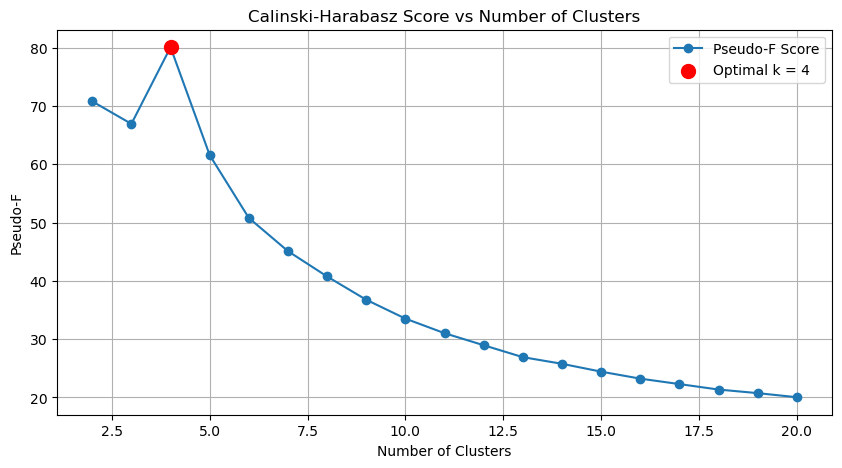

Оптимальное число кластеров: 4


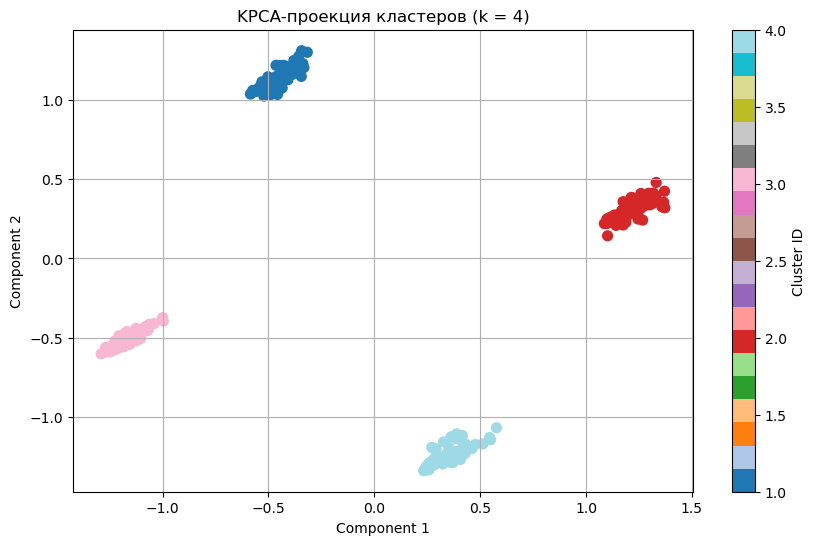


Наиболее типичные представители каждого кластера:
Кластер_1: Henderson, Dave
Кластер_2: Hassey, Ron
Кластер_3: Landreaux, Ken
Кластер_4: Wilson, Mookie


In [295]:
cat_cols = ['Div', 'Division', 'League', 'Position', 'Team']
num_cols = ['CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns', 'logSalary', 'nAssts', 'nAtBat', 'nBB', 'nError', 'nHits', 'nHome', 'nOuts', 'nRBI', 'nRuns', 'YrMajor', 'Salary']
best_k, typical_players = process_and_cluster(df, cat_cols, num_cols)


In [296]:
from scipy.stats import skew

# допустим, num_cols — список исходных числовых признаков
skews = df[num_cols].apply(lambda s: skew(s.dropna()))
# выбираем те, где skew > 1
to_log = skews[skews > 1].index.tolist()
print("Будут лог-преобразованы:", to_log)

# преобразуем
df_log = df.copy()
for col in to_log:
    # log1p безопасен при нулях
    df_log[col] = np.log1p(df_log[col])


Будут лог-преобразованы: ['CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns', 'nAssts', 'nError', 'nOuts', 'Salary']


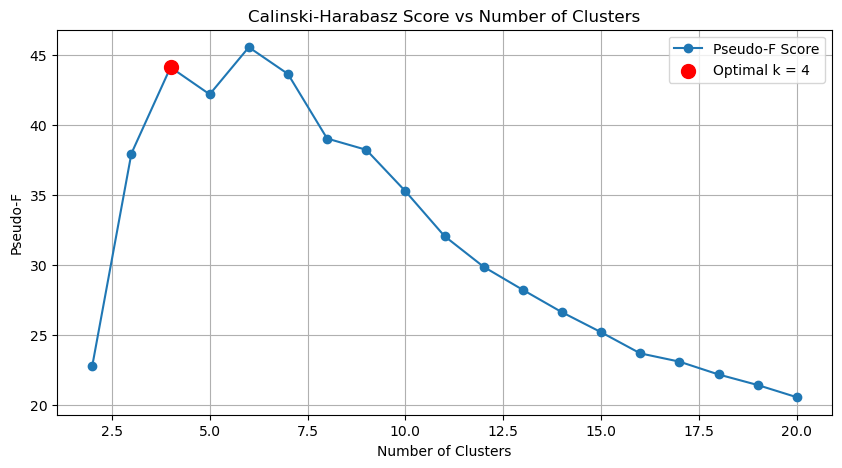

Оптимальное число кластеров: 4


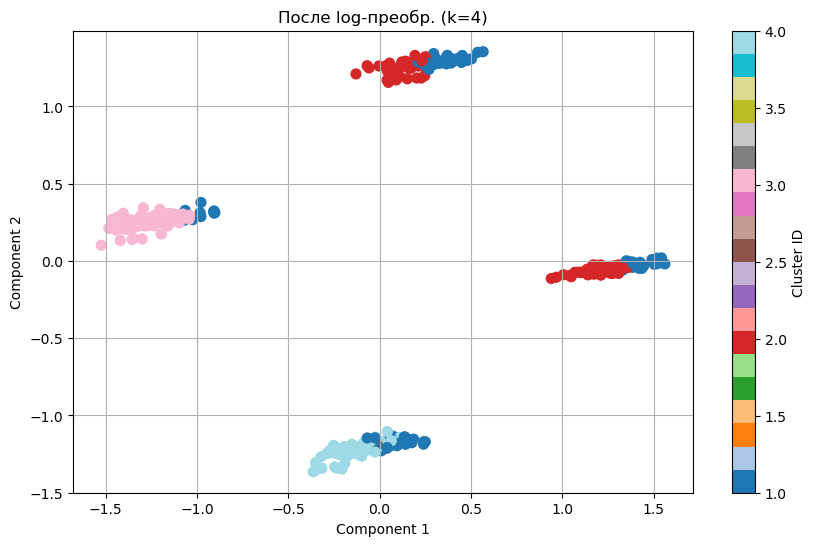


Наиболее типичные представители каждого кластера:
Кластер_1: Bilardello, Dann
Кластер_2: Kennedy, Terry
Кластер_3: Whitt, Ernie
Кластер_4: Davis, Mike


In [297]:
cat_enc  = encode_categorical(df_log, cat_cols)
num_scl  = scale_numerical(df_log, num_cols)
df_all   = pd.concat([num_scl, cat_enc], axis=1)
df_imp   = impute_missing(df_all, k=3)

# отбор по корреляции
df_sel   = select_high_correlation_features(df_imp, threshold=0.6)

# иерархическая кластеризация и поиск k
Z        = perform_hierarchical_clustering(df_sel)
best_k   = find_optimal_k(df_sel, Z, (2,21))

# проекция и визуализация
labels9  = fcluster(Z, best_k, criterion='maxclust')
X9       = project_with_kpca(df_sel)
plot_clusters(X9, labels9, title=f'После log-преобр. (k={best_k})')

# типичные представители
typ9     = find_typical_representatives(df_sel, df_log, labels9)


In [298]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
def varclus_select(df, n_groups):
    # матрица абсолютных корреляций
    corr = df.corr().abs()
    # расстояние
    dist = 1 - corr
    # в векторную форму для linkage
    dist_vec = squareform(dist.values, checks=False)
    Zf = linkage(dist_vec, method='average')
    # разрезаем на n_groups
    groups = fcluster(Zf, n_groups, criterion='maxclust')
    
    # сбор групп и выбор репрезентанта
    selected = []
    for grp_id in np.unique(groups):
        feats = corr.columns[groups == grp_id]
        # средняя корреляция внутри группы
        avg_corr = corr.loc[feats, feats].mean().sort_values(ascending=False)
        selected.append(avg_corr.index[0])
    return selected


После VarClus 6 групп: ['Team_Texas', 'Team_Chicago', 'Position_23', 'Team_Toronto', 'CrRbi', 'Division_West']
Лучший k по силуету: 7


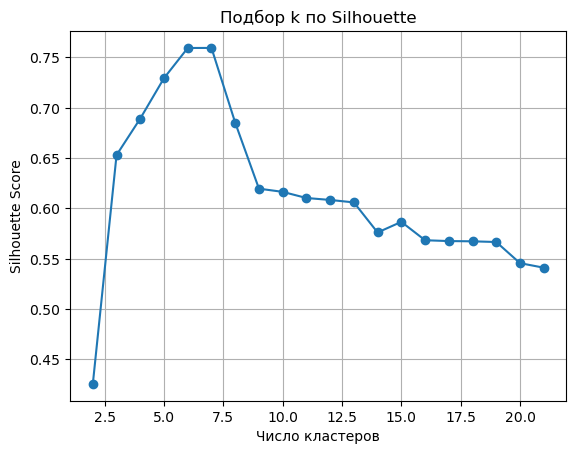

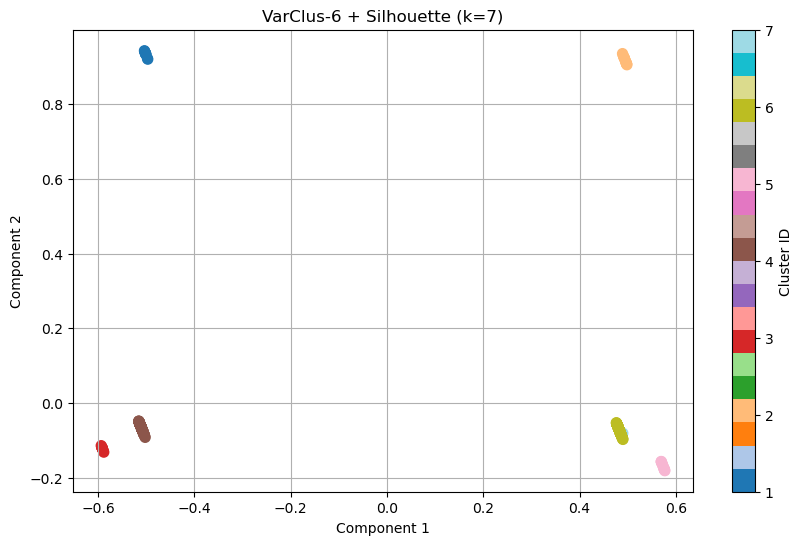


Наиболее типичные представители каждого кластера:
Кластер_1: Davis, Jody
Кластер_2: Hairston, Jerry
Кластер_3: Garcia, Damaso
Кластер_4: Butler, Brett
Кластер_5: Slaught, Don
Кластер_6: Virgil, Ozzie
Кластер_7: Hill, Donnie


In [299]:
from sklearn.metrics import silhouette_score
n_groups=6
feat10b = varclus_select(df_imp, n_groups=n_groups)
print(f"После VarClus {n_groups} групп:", feat10b)

df10b = df_imp[feat10b]

Z10b = perform_hierarchical_clustering(df10b)
sil_scores = []
ks = range(2, 22)
for k in ks:
    labels_k = fcluster(Z10b, k, criterion='maxclust')
    sil_scores.append(silhouette_score(df10b, labels_k))

best_k10b = ks[int(np.argmax(sil_scores))]
print("Лучший k по силуету:", best_k10b)

plt.plot(ks, sil_scores, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette Score')
plt.title('Подбор k по Silhouette')
plt.grid(True)
plt.show()

labels10b = fcluster(Z10b, best_k10b, criterion='maxclust')
X10b = project_with_kpca(df10b)
plot_clusters(X10b, labels10b, title=f'VarClus-{n_groups} + Silhouette (k={best_k10b})')

typ10b = find_typical_representatives(df10b, df, labels10b)


ЭТАП 1: Анализ исходных данных

КЛАСТЕРИЗАЦИЯ: ORIGINAL


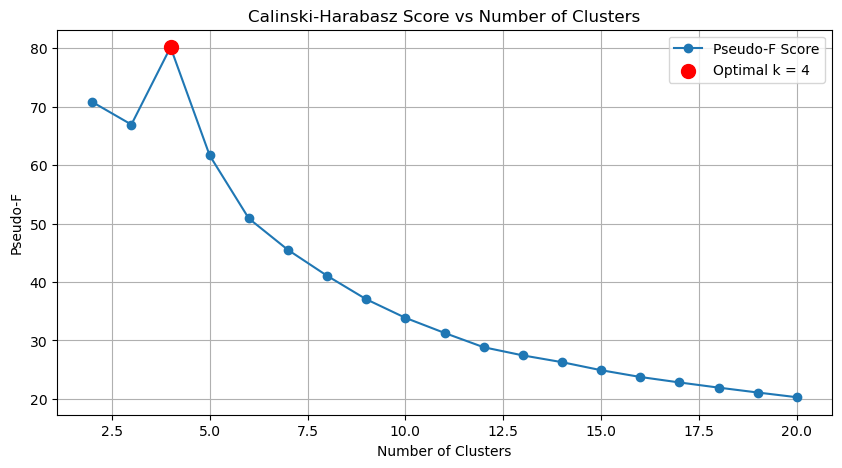

Оптимальное число кластеров: 4


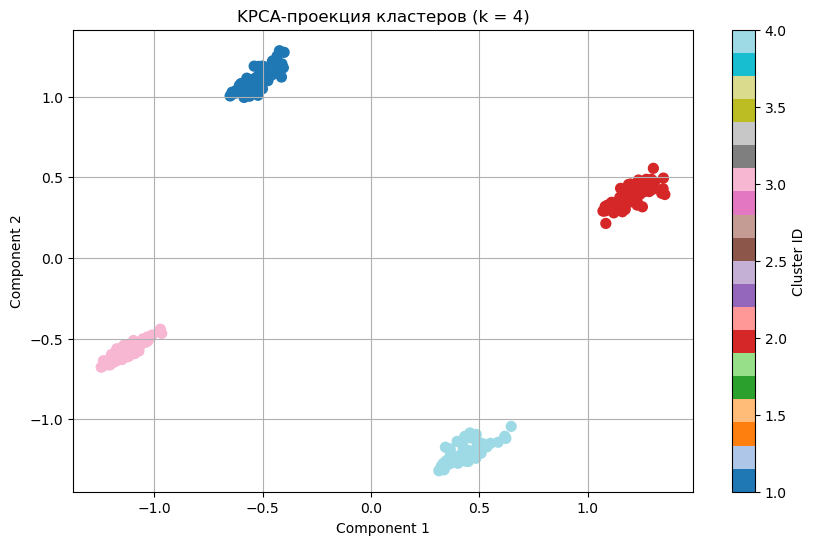


Наиболее типичные представители каждого кластера:
Кластер_1: Henderson, Dave
Кластер_2: Hassey, Ron
Кластер_3: Landreaux, Ken
Кластер_4: Wilson, Mookie

ЭТАП 2: Анализ асимметрии и log-преобразование
Анализ асимметрии распределений:
CrAtBat        : 1.164 - Требует log-преобразования
CrBB           : 1.734 - Требует log-преобразования
CrHits         : 1.296 - Требует log-преобразования
CrHome         : 2.135 - Требует log-преобразования
CrRbi          : 1.459 - Требует log-преобразования
CrRuns         : 1.353 - Требует log-преобразования
Salary         : 1.589 - Требует log-преобразования
nAssts         : 1.358 - Требует log-преобразования
nAtBat         : 0.076 - Нормальное
nBB            : 0.689 - Нормальное
nError         : 1.055 - Требует log-преобразования
nHits          : 0.423 - Нормальное
nHome          : 0.919 - Нормальное
nOuts          : 2.065 - Требует log-преобразования
nRBI           : 0.705 - Нормальное
nRuns          : 0.510 - Нормальное
YrMajor        : 0.716 - Норма

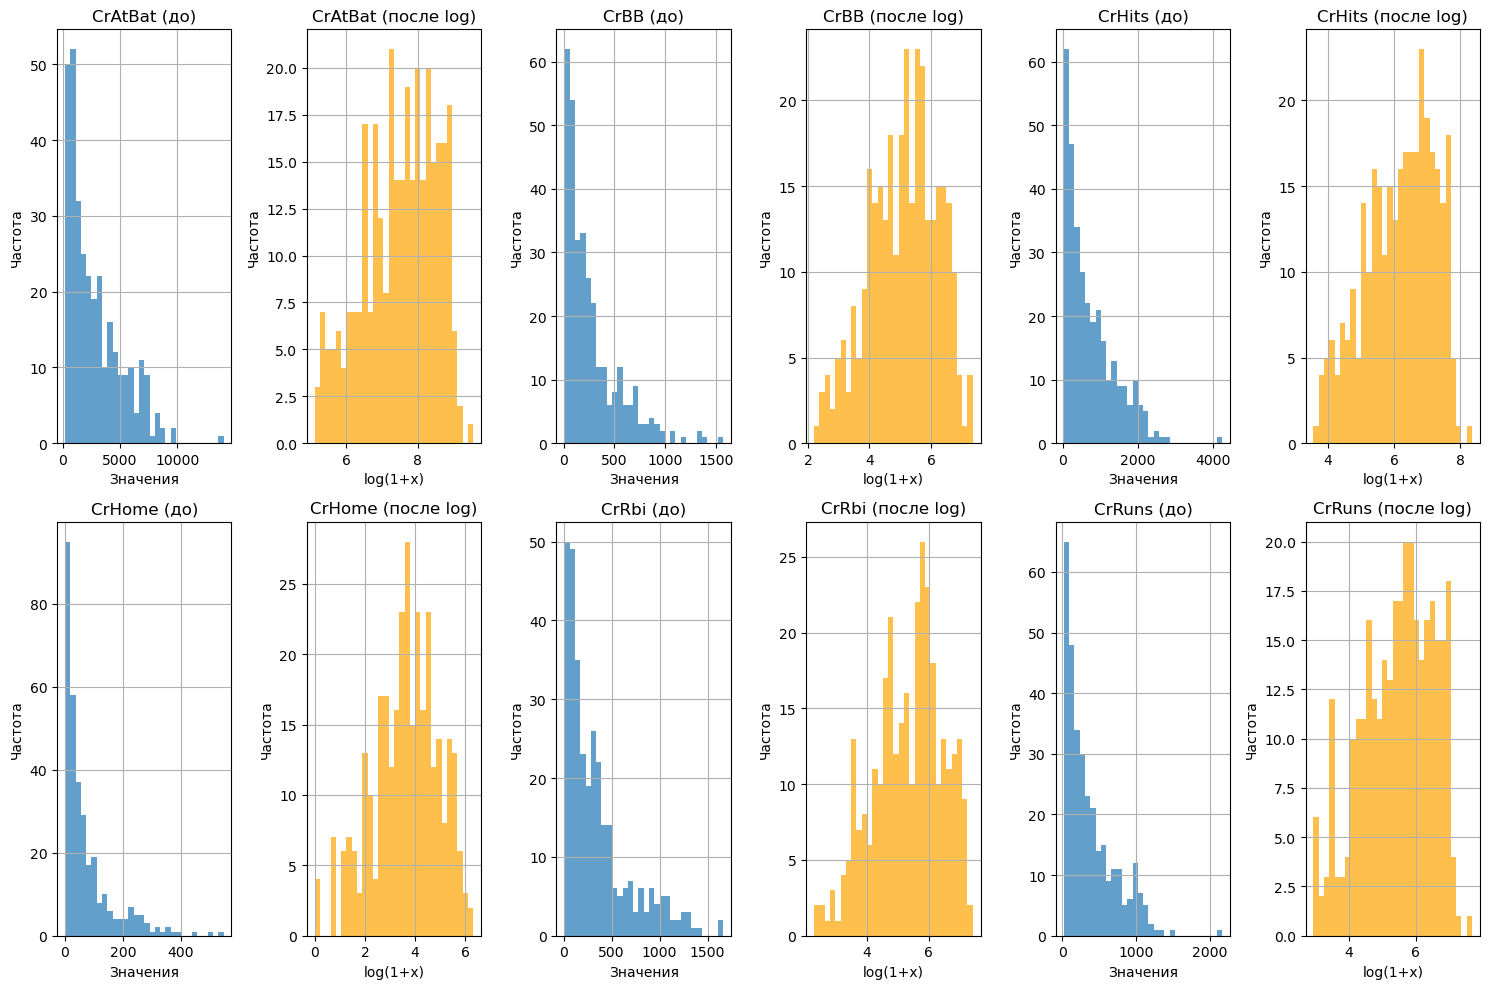


Применение log-преобразования:
✓ CrAtBat: асимметрия 1.164 -> -0.417
✓ CrBB: асимметрия 1.734 -> -0.324
✓ CrHits: асимметрия 1.296 -> -0.415
✓ CrHome: асимметрия 2.135 -> -0.412
✓ CrRbi: асимметрия 1.459 -> -0.372
✓ CrRuns: асимметрия 1.353 -> -0.393
✓ Salary: асимметрия 1.589 -> -0.177
✓ nAssts: асимметрия 1.358 -> -0.228
✓ nError: асимметрия 1.055 -> -0.603
✓ nOuts: асимметрия 2.065 -> -2.202

Всего преобразовано колонок: 10

КЛАСТЕРИЗАЦИЯ: LOG_TRANSFORMED


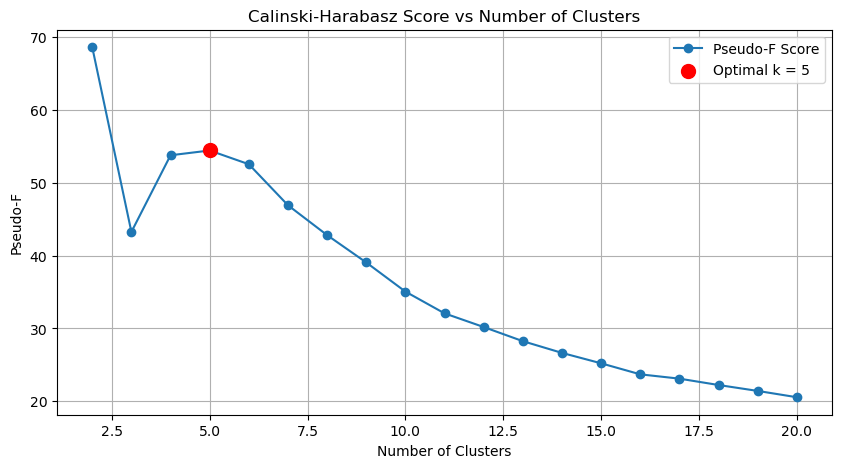

Оптимальное число кластеров: 5


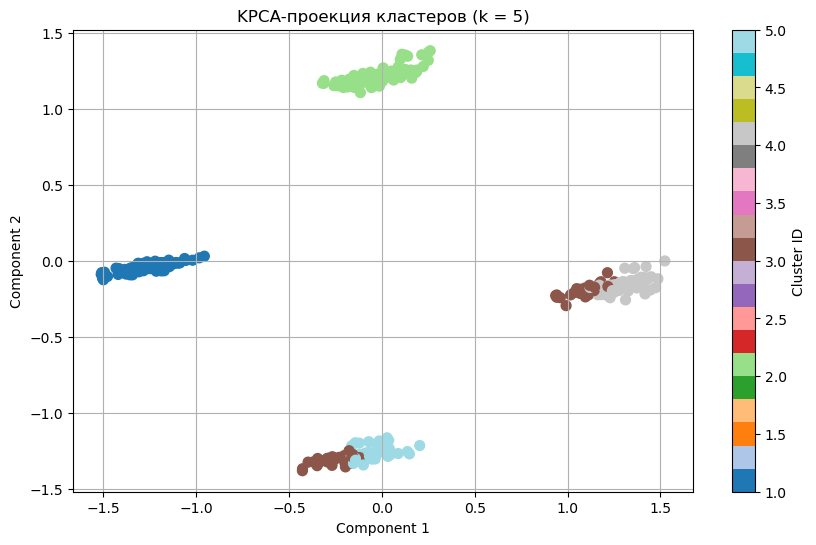


Наиболее типичные представители каждого кластера:
Кластер_1: Brock, Greg
Кластер_2: Slaught, Don
Кластер_3: Fitzgerald, Mike
Кластер_4: Whitt, Ernie
Кластер_5: Durham, Leon

ЭТАП 3: Отбор признаков методом VarClus

Применение упрощенного VarClus:
После отбора по дисперсии осталось 18 переменных из 18
Ошибка в факторном анализе: Input X contains NaN.
FactorAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Использован отбор по дисперсии: 

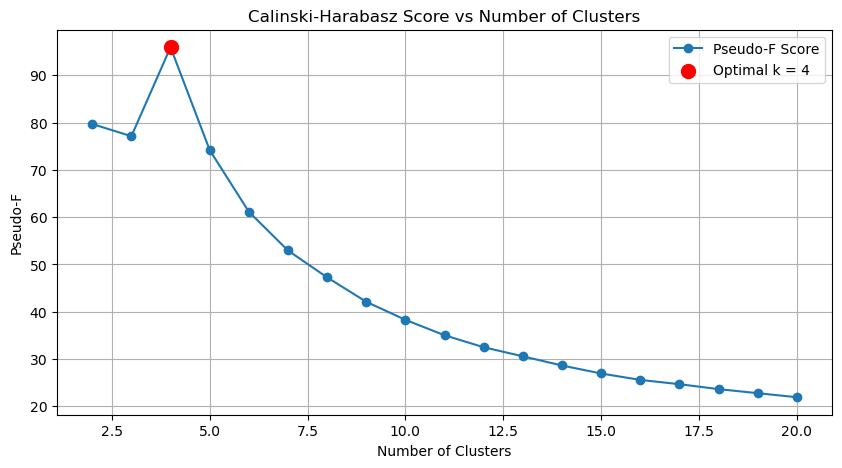

Оптимальное число кластеров: 4


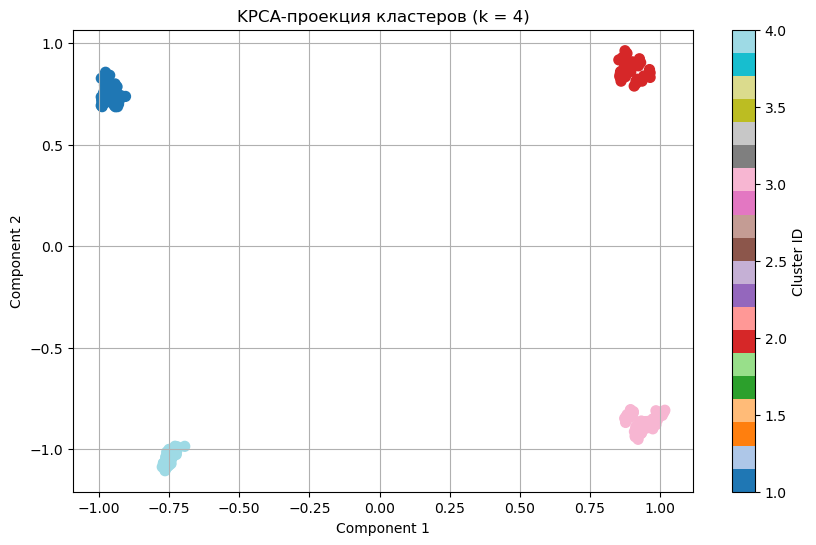


Наиболее типичные представители каждого кластера:
Кластер_1: Slaught, Don
Кластер_2: Gantner, Jim
Кластер_3: Law, Vance
Кластер_4: Landreaux, Ken

СРАВНИТЕЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ

1. КОЛИЧЕСТВО КЛАСТЕРОВ:
------------------------------
original            : 4 кластеров
log_transformed     : 5 кластеров
varclus_selected    : 4 кластеров

2. КОЛИЧЕСТВО ПРИЗНАКОВ:
------------------------------
original            : 22 признаков
log_transformed     : 22 признаков
varclus_selected    : 13 признаков

3. ТИПИЧНЫЕ ПРЕДСТАВИТЕЛИ:
----------------------------------------

ORIGINAL:
  Кластер_1: Henderson, Dave
  Кластер_2: Hassey, Ron
  Кластер_3: Landreaux, Ken
  Кластер_4: Wilson, Mookie

LOG_TRANSFORMED:
  Кластер_1: Brock, Greg
  Кластер_2: Slaught, Don
  Кластер_3: Fitzgerald, Mike
  Кластер_4: Whitt, Ernie
  Кластер_5: Durham, Leon

VARCLUS_SELECTED:
  Кластер_1: Slaught, Don
  Кластер_2: Gantner, Jim
  Кластер_3: Law, Vance
  Кластер_4: Landreaux, Ken

ВЫВОДЫ И РЕКОМЕНДАЦ

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def analyze_skewness(df, numeric_cols, threshold=1.0):
    """
    Анализ асимметрии распределений переменных
    
    Args:
        df (pd.DataFrame): датафрейм с данными
        numeric_cols (list): список числовых колонок
        threshold (float): порог асимметрии для определения сильно скошенных переменных
    
    Returns:
        dict: информация об асимметрии переменных
    """
    skewness_info = {}
    
    print("Анализ асимметрии распределений:")
    print("=" * 50)
    
    for col in numeric_cols:
        if col in df.columns:
            skew_value = df[col].skew()
            skewness_info[col] = {
                'skewness': skew_value,
                'needs_log_transform': skew_value > threshold
            }
            
            status = "Требует log-преобразования" if skew_value > threshold else "Нормальное"
            print(f"{col:<15}: {skew_value:.3f} - {status}")
    
    return skewness_info


def plot_distributions_before_after(df, cols_to_transform, figsize=(15, 10)):
    """
    Визуализация распределений до и после log-преобразования
    
    Args:
        df (pd.DataFrame): исходный датафрейм
        cols_to_transform (list): колонки для преобразования
        figsize (tuple): размер фигуры
    """
    n_cols = len(cols_to_transform)
    n_rows = (n_cols + 2) // 3
    
    fig, axes = plt.subplots(n_rows, 6, figsize=figsize)  # 6 колонок: до и после для каждой переменной
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, col in enumerate(cols_to_transform):
        # До преобразования
        ax_before = axes[i*2] if n_rows > 1 or len(cols_to_transform) > 1 else axes[0]
        df[col].hist(bins=30, alpha=0.7, ax=ax_before)
        ax_before.set_title(f'{col} (до)')
        ax_before.set_xlabel('Значения')
        ax_before.set_ylabel('Частота')
        
        # После преобразования
        ax_after = axes[i*2+1] if n_rows > 1 or len(cols_to_transform) > 1 else axes[1]
        log_transformed = np.log1p(df[col])
        log_transformed.hist(bins=30, alpha=0.7, ax=ax_after, color='orange')
        ax_after.set_title(f'{col} (после log)')
        ax_after.set_xlabel('log(1+x)')
        ax_after.set_ylabel('Частота')
    
    # Скрыть неиспользуемые оси
    for j in range(len(cols_to_transform)*2, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()


def apply_log_transformation(df, numeric_cols, skew_threshold=1.0):
    """
    Применение log-преобразования к сильно скошенным переменным
    
    Args:
        df (pd.DataFrame): исходный датафрейм
        numeric_cols (list): список числовых колонок
        skew_threshold (float): порог асимметрии
    
    Returns:
        tuple: (преобразованный датафрейм, список преобразованных колонок)
    """
    df_transformed = df.copy()
    transformed_cols = []
    
    print("\nПрименение log-преобразования:")
    print("=" * 40)
    
    for col in numeric_cols:
        if col in df.columns and col != 'logSalary':  # Исключаем уже преобразованную колонку
            skew_value = df[col].skew()
            
            if skew_value > skew_threshold:
                # Проверяем на наличие отрицательных значений
                if df[col].min() >= 0:
                    df_transformed[col] = np.log1p(df[col])
                    transformed_cols.append(col)
                    print(f"✓ {col}: асимметрия {skew_value:.3f} -> {df_transformed[col].skew():.3f}")
                else:
                    print(f"✗ {col}: содержит отрицательные значения, пропускаем")
    
    print(f"\nВсего преобразовано колонок: {len(transformed_cols)}")
    
    return df_transformed, transformed_cols


def simple_varclus(df, n_components=None, variance_threshold=0.01):
    """
    Упрощенная реализация VarClus с использованием факторного анализа
    и отбора по дисперсии
    
    Args:
        df (pd.DataFrame): датафрейм с переменными
        n_components (int): количество факторов (если None, определяется автоматически)
        variance_threshold (float): порог дисперсии для отбора переменных
    
    Returns:
        list: список отобранных переменных
    """
    print("\nПрименение упрощенного VarClus:")
    print("=" * 40)
    
    # Удаляем переменные с низкой дисперсией
    selector = VarianceThreshold(threshold=variance_threshold)
    df_high_var = pd.DataFrame(
        selector.fit_transform(df),
        columns=df.columns[selector.get_support()],
        index=df.index
    )
    
    print(f"После отбора по дисперсии осталось {df_high_var.shape[1]} переменных из {df.shape[1]}")
    
    # Определяем оптимальное количество факторов
    if n_components is None:
        n_components = min(10, df_high_var.shape[1] // 2)
    
    # Факторный анализ
    fa = FactorAnalysis(n_components=n_components, random_state=42)
    
    try:
        fa.fit(df_high_var)
        loadings = pd.DataFrame(
            fa.components_.T,
            columns=[f'Factor_{i+1}' for i in range(n_components)],
            index=df_high_var.columns
        )
        
        # Для каждого фактора выбираем переменную с максимальной нагрузкой
        selected_vars = []
        for factor in loadings.columns:
            max_loading_var = loadings[factor].abs().idxmax()
            if max_loading_var not in selected_vars:
                selected_vars.append(max_loading_var)
        
        # Добавляем переменные с высокими уникальными нагрузками
        for var in df_high_var.columns:
            max_loading = loadings.loc[var].abs().max()
            if max_loading > 0.7 and var not in selected_vars:
                selected_vars.append(var)
        
        print(f"Факторный анализ: выбрано {len(selected_vars)} переменных")
        print("Отобранные переменные:", selected_vars[:10], "..." if len(selected_vars) > 10 else "")
        
        return selected_vars
        
    except Exception as e:
        print(f"Ошибка в факторном анализе: {e}")
        # Возвращаем переменные с наибольшей дисперсией
        variances = df_high_var.var().sort_values(ascending=False)
        selected_vars = variances.head(n_components).index.tolist()
        print(f"Использован отбор по дисперсии: выбрано {len(selected_vars)} переменных")
        return selected_vars


def compare_clustering_results(df, cat_cols, num_cols, transformation_type="original"):
    """
    Запуск кластеризации и сохранение результатов для сравнения
    
    Args:
        df (pd.DataFrame): датафрейм для кластеризации
        cat_cols (list): категориальные колонки
        num_cols (list): числовые колонки
        transformation_type (str): тип преобразования для идентификации
    
    Returns:
        dict: результаты кластеризации
    """
    print(f"\n{'='*60}")
    print(f"КЛАСТЕРИЗАЦИЯ: {transformation_type.upper()}")
    print(f"{'='*60}")
    
    try:
        best_k, typical_players = process_and_cluster(df, cat_cols, num_cols)
        
        results = {
            'transformation': transformation_type,
            'best_k': best_k,
            'typical_players': typical_players,
            'n_features': len(num_cols) + len([c for c in cat_cols if c in df.columns])
        }
        
        return results
        
    except Exception as e:
        print(f"Ошибка в кластеризации: {e}")
        return {
            'transformation': transformation_type,
            'best_k': None,
            'typical_players': {},
            'n_features': 0,
            'error': str(e)
        }


def analyze_clustering_changes(results_list):
    """
    Анализ изменений в результатах кластеризации
    
    Args:
        results_list (list): список результатов кластеризации
    """
    print(f"\n{'='*80}")
    print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ")
    print(f"{'='*80}")
    
    # Сравнение количества кластеров
    print("\n1. КОЛИЧЕСТВО КЛАСТЕРОВ:")
    print("-" * 30)
    for result in results_list:
        if result['best_k'] is not None:
            print(f"{result['transformation']:<20}: {result['best_k']} кластеров")
        else:
            print(f"{result['transformation']:<20}: Ошибка в кластеризации")
    
    # Сравнение количества признаков
    print("\n2. КОЛИЧЕСТВО ПРИЗНАКОВ:")
    print("-" * 30)
    for result in results_list:
        print(f"{result['transformation']:<20}: {result['n_features']} признаков")
    
    # Сравнение типичных представителей
    print("\n3. ТИПИЧНЫЕ ПРЕДСТАВИТЕЛИ:")
    print("-" * 40)
    for result in results_list:
        print(f"\n{result['transformation'].upper()}:")
        if result['typical_players']:
            for cluster, player in result['typical_players'].items():
                print(f"  {cluster}: {player}")
        else:
            print("  Нет данных")
    
    # Анализ изменений
    print(f"\n{'='*80}")
    print("ВЫВОДЫ И РЕКОМЕНДАЦИИ:")
    print(f"{'='*80}")
    
    if len(results_list) >= 2:
        original = results_list[0]
        log_transformed = results_list[1] if len(results_list) > 1 else None
        varclus = results_list[2] if len(results_list) > 2 else None
        
        print("\n🔍 АНАЛИЗ ВЛИЯНИЯ LOG-ПРЕОБРАЗОВАНИЯ:")
        if log_transformed and log_transformed['best_k'] is not None:
            if log_transformed['best_k'] != original['best_k']:
                print(f"  • Количество кластеров изменилось: {original['best_k']} → {log_transformed['best_k']}")
                if log_transformed['best_k'] > original['best_k']:
                    print("  • Log-преобразование выявило более детальную структуру данных")
                else:
                    print("  • Log-преобразование привело к укрупнению кластеров")
            else:
                print("  • Количество кластеров не изменилось")
                print("  • Возможно, изменилась внутренняя структура кластеров")
            
            print("  • Log-преобразование помогло сделать распределения более симметричными")
            print("  • Это может улучшить качество кластеризации для алгоритмов, чувствительных к выбросам")
        
        print("\n🔍 АНАЛИЗ ВЛИЯНИЯ ОТБОРА ПРИЗНАКОВ (VarClus):")
        if varclus and varclus['best_k'] is not None:
            print(f"  • Количество признаков сокращено до {varclus['n_features']}")
            if varclus['best_k'] != original['best_k']:
                print(f"  • Количество кластеров изменилось: {original['best_k']} → {varclus['best_k']}")
                print("  • Отбор признаков выявил другую структуру в данных")
            else:
                print("  • Количество кластеров не изменилось")
                print("  • Основная структура данных сохранилась при меньшем количестве признаков")
            
            print("  • Отбор признаков может:")
            print("    - Уменьшить шум в данных")
            print("    - Повысить интерпретируемость результатов")
            print("    - Ускорить вычисления")
            print("    - Снизить проклятие размерности")


def run_comprehensive_analysis(csv_path):
    """
    Запуск полного анализа с различными преобразованиями данных
    
    Args:
        csv_path (str): путь к CSV файлу
    
    Returns:
        list: результаты всех экспериментов
    """
    # Загрузка данных
    df = pd.read_csv(csv_path)
    
    cat_cols = ['Div', 'Division', 'League', 'Position', 'Team']
    num_cols = [
        'CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns',
        'Salary', 'nAssts', 'nAtBat', 'nBB', 'nError',
        'nHits', 'nHome', 'nOuts', 'nRBI', 'nRuns', 'YrMajor'
    ]
    
    results = []
    
    # 1. Исходные данные
    print("ЭТАП 1: Анализ исходных данных")
    original_result = compare_clustering_results(df, cat_cols, num_cols, "original")
    results.append(original_result)
    
    # 2. Анализ асимметрии и log-преобразование
    print("\nЭТАП 2: Анализ асимметрии и log-преобразование")
    skewness_info = analyze_skewness(df, num_cols)
    
    cols_to_transform = [col for col, info in skewness_info.items() 
                        if info['needs_log_transform'] and col != 'logSalary']
    
    if cols_to_transform:
        print(f"\nПеременные, требующие log-преобразования: {cols_to_transform}")
        plot_distributions_before_after(df, cols_to_transform[:6])  # Показываем первые 6
        
        df_log_transformed, transformed_cols = apply_log_transformation(df, num_cols)
        log_result = compare_clustering_results(df_log_transformed, cat_cols, num_cols, "log_transformed")
        results.append(log_result)
    else:
        print("Переменные с сильной асимметрией не найдены")
        results.append({
            'transformation': 'log_transformed',
            'best_k': None,
            'typical_players': {},
            'n_features': 0,
            'note': 'Не требуется'
        })
    
    # 3. VarClus отбор признаков
    print("\nЭТАП 3: Отбор признаков методом VarClus")
    
    # Подготавливаем данные для VarClus (только числовые)
    df_for_varclus = df[num_cols].copy()
    df_for_varclus['logSalary'] = np.log1p(df_for_varclus['Salary'])
    
    selected_features = simple_varclus(df_for_varclus, n_components=8)
    
    if selected_features:
        # Создаем новый список числовых колонок
        num_cols_selected = [col for col in selected_features if col in num_cols + ['logSalary']]
        
        varclus_result = compare_clustering_results(df, cat_cols, num_cols_selected, "varclus_selected")
        results.append(varclus_result)
    else:
        results.append({
            'transformation': 'varclus_selected',
            'best_k': None,
            'typical_players': {},
            'n_features': 0,
            'error': 'Не удалось отобрать признаки'
        })
    
    # 4. Комплексный анализ результатов
    analyze_clustering_changes(results)
    
    return results


# Пример использования:
results = run_comprehensive_analysis('baseball.csv')
print("Код готов к использованию!")
print("Запустите: results = run_comprehensive_analysis('baseball.csv')")